In [35]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

In [37]:
df = pd.read_csv("Data_USD.csv")
df.head()

,LIMIT_BAL_US,SEX,EDUCATION,MARRIAGE,AGE,PAY_SCORE_AVG,BILL_AVG_US,PAY_AMT_AVG_US,PAY_TO_BILL,CREDIT_UTILIZATION,DEFAULT_PAYMENT_NEXT_MO
0,725.714286,2,2,1,24,-0.33,46.590857,4.166810,0.09,0.195650,1
1,4354.285714,2,2,2,26,0.50,103.275191,30.238095,0.29,0.022350,1
2,3265.714286,2,2,2,34,0.00,614.758619,66.632667,0.11,0.324878,0
3,1814.285714,2,2,1,37,0.00,1399.019905,50.727429,0.04,0.939800,0
4,1814.285714,1,2,1,57,-0.33,661.240619,357.105857,0.54,0.172340,0


In [40]:
# X = df.drop('Y_Value',axis =1).values
# y = df['Y_Value'].values
X = df.drop('DEFAULT_PAYMENT_NEXT_MO',axis =1).values
y = df['DEFAULT_PAYMENT_NEXT_MO'].values
print(X.shape)
print(y.shape)

(30000, 10)
(30000,)


In [41]:
X_train, X_test, y_train, y_test = train_test_split (X,y,random_state=1)

In [42]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [43]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [44]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [45]:
from keras.models import Sequential

#instantiate
model = Sequential()

In [46]:
from keras.layers import Dense

number_inputs = 10
number_hidden = 30

model.add(Dense(units = number_hidden, activation ='relu', input_dim=number_inputs))
model.add(Dense(units = 10, activation ='relu')) #second hidden layer

In [47]:
number_classes =2 ## yes or no
model.add(Dense(units = number_classes, activation = 'softmax'))

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 22        
Total params: 662
Trainable params: 662
Non-trainable params: 0
_________________________________________________________________


In [49]:
#compile the model
model.compile(optimizer = 'adam' ,
             loss = 'categorical_crossentropy',
             metrics =['accuracy'])

In [50]:
#train the model

model.fit(X_train_scaled, y_train_categorical, epochs=100,shuffle = True,verbose =2)

Epoch 1/100
 - 2s - loss: 0.4894 - acc: 0.7944
Epoch 2/100
 - 1s - loss: 0.4648 - acc: 0.8036
Epoch 3/100
 - 1s - loss: 0.4572 - acc: 0.8060
Epoch 4/100
 - 1s - loss: 0.4531 - acc: 0.8082
Epoch 5/100
 - 1s - loss: 0.4504 - acc: 0.8074
Epoch 6/100
 - 1s - loss: 0.4493 - acc: 0.8074
Epoch 7/100
 - 1s - loss: 0.4478 - acc: 0.8077
Epoch 8/100
 - 1s - loss: 0.4461 - acc: 0.8074
Epoch 9/100
 - 1s - loss: 0.4457 - acc: 0.8071
Epoch 10/100
 - 1s - loss: 0.4450 - acc: 0.8077
Epoch 11/100
 - 1s - loss: 0.4443 - acc: 0.8073
Epoch 12/100
 - 1s - loss: 0.4432 - acc: 0.8077
Epoch 13/100
 - 2s - loss: 0.4433 - acc: 0.8078
Epoch 14/100
 - 1s - loss: 0.4425 - acc: 0.8076
Epoch 15/100
 - 1s - loss: 0.4417 - acc: 0.8083
Epoch 16/100
 - 1s - loss: 0.4418 - acc: 0.8084
Epoch 17/100
 - 1s - loss: 0.4413 - acc: 0.8083
Epoch 18/100
 - 1s - loss: 0.4410 - acc: 0.8076
Epoch 19/100
 - 1s - loss: 0.4407 - acc: 0.8092
Epoch 20/100
 - 2s - loss: 0.4405 - acc: 0.8083
Epoch 21/100
 - 1s - loss: 0.4403 - acc: 0.8089
E

In [14]:
#quantify the model
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test_categorical,verbose =2)
print( model_loss )
print (model_accuracy)

0.469202428579
0.806933333302


F1, Precision Recall, and Confusion Matrix

In [23]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [24]:
y_prediction = model.predict_classes(X_test)

In [25]:
print("Recall score:"+ str(recall_score(y_test, y_prediction)))

Recall score:0.429856115108


In [26]:
print(classification_report(y_test, y_prediction,
                            target_names=["default", "non_default"]))

             precision    recall  f1-score   support

    default       0.80      0.65      0.72      5832
non_default       0.26      0.43      0.32      1668

avg / total       0.68      0.60      0.63      7500



In [27]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Confusion matrix, without normalization
[[3791 2041]
 [ 951  717]]
Normalized confusion matrix
[[ 0.65  0.35]
 [ 0.57  0.43]]


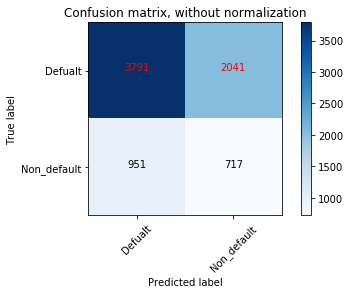

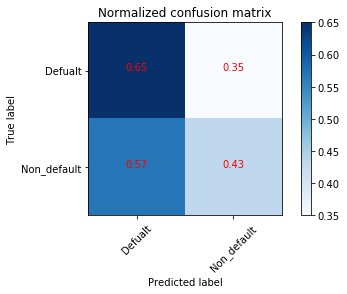

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Defualt', 'Non_default'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Defualt', 'Non_default'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()